In [229]:
# LABS 2
# Probabilistic Building Blocks

# Python dictonary dict = {'key':value, ...}
# pd.DataFrame(dict)

# 1e4 is a double! =>
# np.int(1e4) = 10 000

In [230]:
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [272]:
# Create random dataset
import numpy as np

mu = 0.3
sigma = 1
rows_size = 10000
cols_size = 4
size = [rows_size, cols_size]

data_normal = np.random.normal(mu, sigma, size)
print(data_normal)

[[ 1.11028762  0.93385764  1.51555446  0.26173811]
 [ 0.05150983 -0.35548507  0.45669825  0.91251569]
 [-0.4246491  -1.20101861  0.25706134 -1.13269761]
 ...
 [-0.81358626  0.45837022  0.4684751   1.48987814]
 [-0.3287801  -0.37527934 -0.23572698  0.3326262 ]
 [ 0.75841553  1.11971979  0.98859604 -1.27626768]]


In [232]:
data_normal.shape

(10000, 4)

In [252]:
# Data in each col:
first_col = data_normal[:,0]
second_col = data_normal[:,1]
third_col = data_normal[:,2]
fourth_col = data_normal[:,3]

print(first_col)
print(second_col)
print(third_col)
print(fourth_col)

[1.86913919 0.04125309 1.07548495 ... 0.04819489 3.32367537 1.05718362]
[-1.24115236  1.02142993  0.95063082 ... -0.9657994   2.54277382
  0.40716147]
[ 1.14448588  1.0773425  -0.17277544 ... -0.16445332  0.99799782
  0.44088166]
[ 1.10807578  0.26067189 -0.94671048 ...  0.25553136  0.38195017
  0.28547489]


In [253]:
dictionary = {'Time': first_col, 
        'Height': second_col, 
        'Temperature': third_col,
        'Length' : fourth_col}
print(dictionary)

{'Time': array([1.86913919, 0.04125309, 1.07548495, ..., 0.04819489, 3.32367537,
       1.05718362]), 'Height': array([-1.24115236,  1.02142993,  0.95063082, ..., -0.9657994 ,
        2.54277382,  0.40716147]), 'Temperature': array([ 1.14448588,  1.0773425 , -0.17277544, ..., -0.16445332,
        0.99799782,  0.44088166]), 'Length': array([ 1.10807578,  0.26067189, -0.94671048, ...,  0.25553136,
        0.38195017,  0.28547489])}


In [254]:
import pandas as pd 

# Convert the dictionary into DataFrame
df = pd.DataFrame(dictionary, columns=['Time', 'Height', 'Temperature', 'Length'])
print(df) # [10000 rows x 4 columns]

          Time    Height  Temperature    Length
0     1.869139 -1.241152     1.144486  1.108076
1     0.041253  1.021430     1.077342  0.260672
2     1.075485  0.950631    -0.172775 -0.946710
3    -0.588268  1.014788     0.274886  0.669496
4    -1.095797 -0.224056     0.393341  0.893093
...        ...       ...          ...       ...
9995  0.203808 -0.668089     0.100905  0.746100
9996 -1.056833  1.675100     2.291382  1.098890
9997  0.048195 -0.965799    -0.164453  0.255531
9998  3.323675  2.542774     0.997998  0.381950
9999  1.057184  0.407161     0.440882  0.285475

[10000 rows x 4 columns]


In [255]:
df.columns

Index(['Time', 'Height', 'Temperature', 'Length'], dtype='object')

In [256]:
# Part 1 - Sampling in Python and visualising samples

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# NORMAL DISTRIBUTION
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Using histograms with and without cumulative option observe how increasing variance and mean changes look of the distribution.
# Check how number of bins influences the plots.
# Consider what would make normal distribution weekly informative and what will make it informative.

# Melting Data Frame
df_melt = pd.melt(df, value_vars=['Height', 'Temperature', 'Length'])

In [257]:
print(df_melt)

      variable     value
0       Height -1.241152
1       Height  1.021430
2       Height  0.950631
3       Height  1.014788
4       Height -0.224056
...        ...       ...
29995   Length  0.746100
29996   Length  1.098890
29997   Length  0.255531
29998   Length  0.381950
29999   Length  0.285475

[30000 rows x 2 columns]


In [258]:
df_melt.columns

Index(['variable', 'value'], dtype='object')

In [259]:
variable = df_melt.variable
print(variable)

0        Height
1        Height
2        Height
3        Height
4        Height
          ...  
29995    Length
29996    Length
29997    Length
29998    Length
29999    Length
Name: variable, Length: 30000, dtype: object


In [260]:
value = df_melt.value
print(value)

0       -1.241152
1        1.021430
2        0.950631
3        1.014788
4       -0.224056
           ...   
29995    0.746100
29996    1.098890
29997    0.255531
29998    0.381950
29999    0.285475
Name: value, Length: 30000, dtype: float64


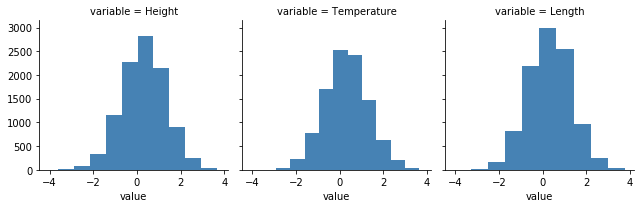

In [261]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# WITHOUT CUMMULATIVE
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", cumulative = False)

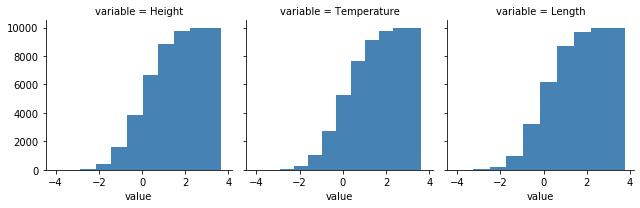

In [262]:
# WITH CUMMULATIVE
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", cumulative = True)

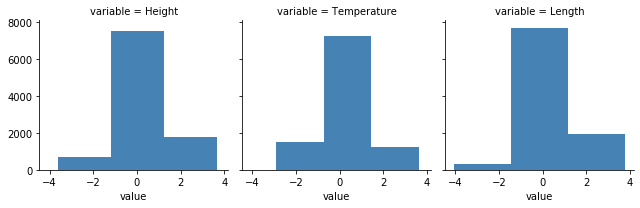

In [263]:
# RANDOM BINS VALUE
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", bins=3)

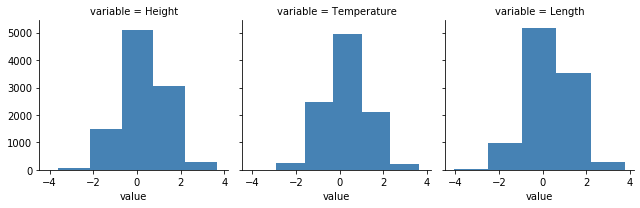

In [264]:
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", bins=5)

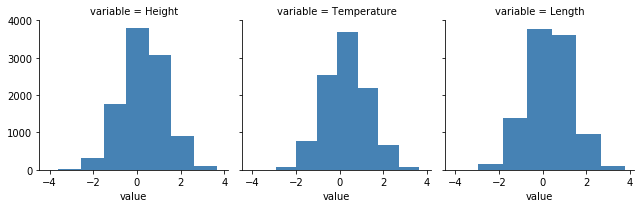

In [265]:
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", bins=7)

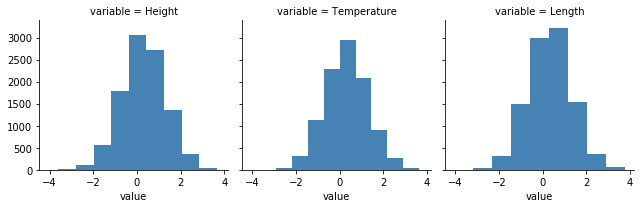

In [266]:
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", bins=9)

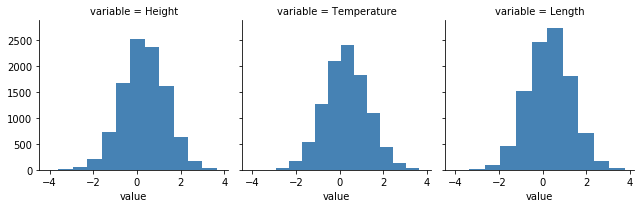

In [267]:
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", bins=11)

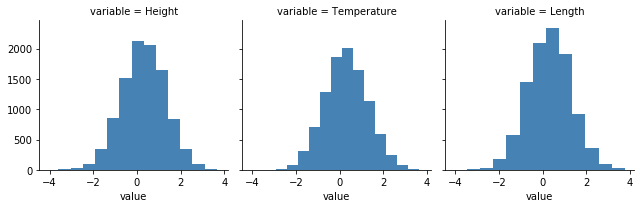

In [268]:
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", bins=13)

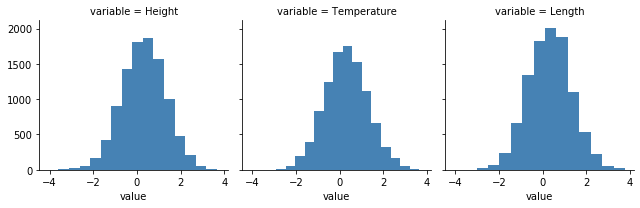

In [269]:
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", bins=15)

In [271]:
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# NORMAL DISTRIBUTION (with inverse logit)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Transform samples from normal distribution with inverse logit.
# Consider how mean and standard deviation influence the shape of histogram and cdf.
# Is previously non-informative normal is still non-informative after transformation?

from scipy.special import logit, expit

inverse_logic = expit(logit(df))
print(inverse_logic) # [10000 rows x 4 columns]

          Time    Height  Temperature    Length
0          NaN       NaN          NaN       NaN
1     0.041253       NaN          NaN  0.260672
2          NaN  0.950631          NaN       NaN
3          NaN       NaN     0.274886  0.669496
4          NaN       NaN     0.393341  0.893093
...        ...       ...          ...       ...
9995  0.203808       NaN     0.100905  0.746100
9996       NaN       NaN          NaN       NaN
9997  0.048195       NaN          NaN  0.255531
9998       NaN       NaN     0.997998  0.381950
9999       NaN  0.407161     0.440882  0.285475

[10000 rows x 4 columns]


In [279]:
# ----------------------------------------------------------------------------------------------------------------------------------------------------------
# POISSON DISTRIBUTIO
# ----------------------------------------------------------------------------------------------------------------------------------------------------------

# Poisson distribution.
# This distribution returns integers (give histogram location of bins instead of their numbers), depending on intensity.
# This is a good distribution for modelling countable effects.
# Observe how mean and variance influence the shape.

lam = 5
rows_size = 10000
cols_size = 4
size = [rows_size, cols_size]

data_poisson = np.random.poisson(lam, size)
print(data_poisson)

[[4 5 6 6]
 [6 3 5 6]
 [3 3 5 4]
 ...
 [2 6 7 8]
 [7 6 5 2]
 [3 6 7 3]]


In [288]:
# Data in each col:
first_col = data_poisson[:,0]
second_col = data_poisson[:,1]
third_col = data_poisson[:,2]
fourth_col = data_poisson[:,3]

In [296]:
dictionary = {'Time': first_col, 
        'Height': second_col, 
        'Temperature': third_col,
        'Length' : fourth_col}

In [290]:
# Convert the dictionary into DataFrame
df = pd.DataFrame(dictionary, columns=['Time', 'Height', 'Temperature', 'Length'])

In [291]:
# Melting Data Frame
df_melt = pd.melt(df, value_vars=['Height', 'Temperature', 'Length'])
variable = df_melt.variable
value = df_melt.value

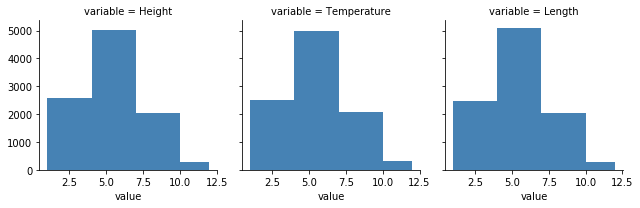

In [308]:
grid = sns.FacetGrid(data=df_melt,col='variable',col_wrap=3)
grid.map(plt.hist, "value", color="steelblue", bins=[1, 4, 7, 10, 12]) #location of bins (instead of their numbers)

In [8]:
# ----------------------------------------------------------------------------------------------------------------------------------------------------------
# BETA DISTRIBUTION
# ----------------------------------------------------------------------------------------------------------------------------------------------------------

# Beta distribution.
# This is a distribution defined on [0,1] interval.
# It is useful as a prior for probability parameters (like binomial distribution).
# Traditionally it is defined with $\alpha$ and $\beta$ parameters.
# There are however different reparametrizations possible.
# Verify how beta distributions behave for their natural parametrization,
# location dispersion parametrization and mean-population size parametrization (see lecture notes)

In [9]:
# ----------------------------------------------------------------------------------------------------------------------------------------------------------
# LOG-NORMAL DISTRIBUTION
# ----------------------------------------------------------------------------------------------------------------------------------------------------------

# Log-normal distribution. This is a great distributions for positive variables, especially if scale can differ (for example salaries).
# Assumtion is that the logarithm of variable of interest is normaly distributed.
# Observe how mean and variance of normal distribution are propagating through transformation.

In [309]:
# ----------------------------------------------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
# Part 2 - Sampling in Stan